In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
bike_data= pd.read_csv("day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:

bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
len(bike_data.columns)

16

In [6]:
bike_data.shape

(730, 16)

In [7]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### we don't have any missing values. so going ahead with the data 

### dropping the redundant columns i,e: instant, dteday, Casusal, registered

In [9]:
bike_data.drop(['instant'],axis=1,inplace=True)

bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
bike_data.drop(['dteday'],axis=1,inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Casual, Registered both are summed up in cnt, hence dropping the columns 

In [11]:
bike_data.drop(["casual","registered"],axis=1,inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Handling and visualizing the categorical data 

In [13]:
#categorical data columns : season,weekday,weathersit,mnth

In [14]:
bike_data['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [15]:
bike_data['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace= True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
bike_data['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [17]:
bike_data['weekday'].replace({0:"Sunday",1:"Monday",2:'Tuesday',3:'Wednesday',4:'Thursday',
                              5:"Friday",6:"Saturday"},inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
bike_data['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
bike_data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Saturday,0,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Sunday,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Monday,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Tuesday,1,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Wednesday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [19]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [20]:
bike_data['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [21]:
#changing datatypes of numerical columns to appropriate types
bike_data[['atemp','hum','windspeed','cnt']]=bike_data[['atemp','hum','windspeed','cnt']].apply(pd.to_numeric)


In [22]:
bike_data.head()
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


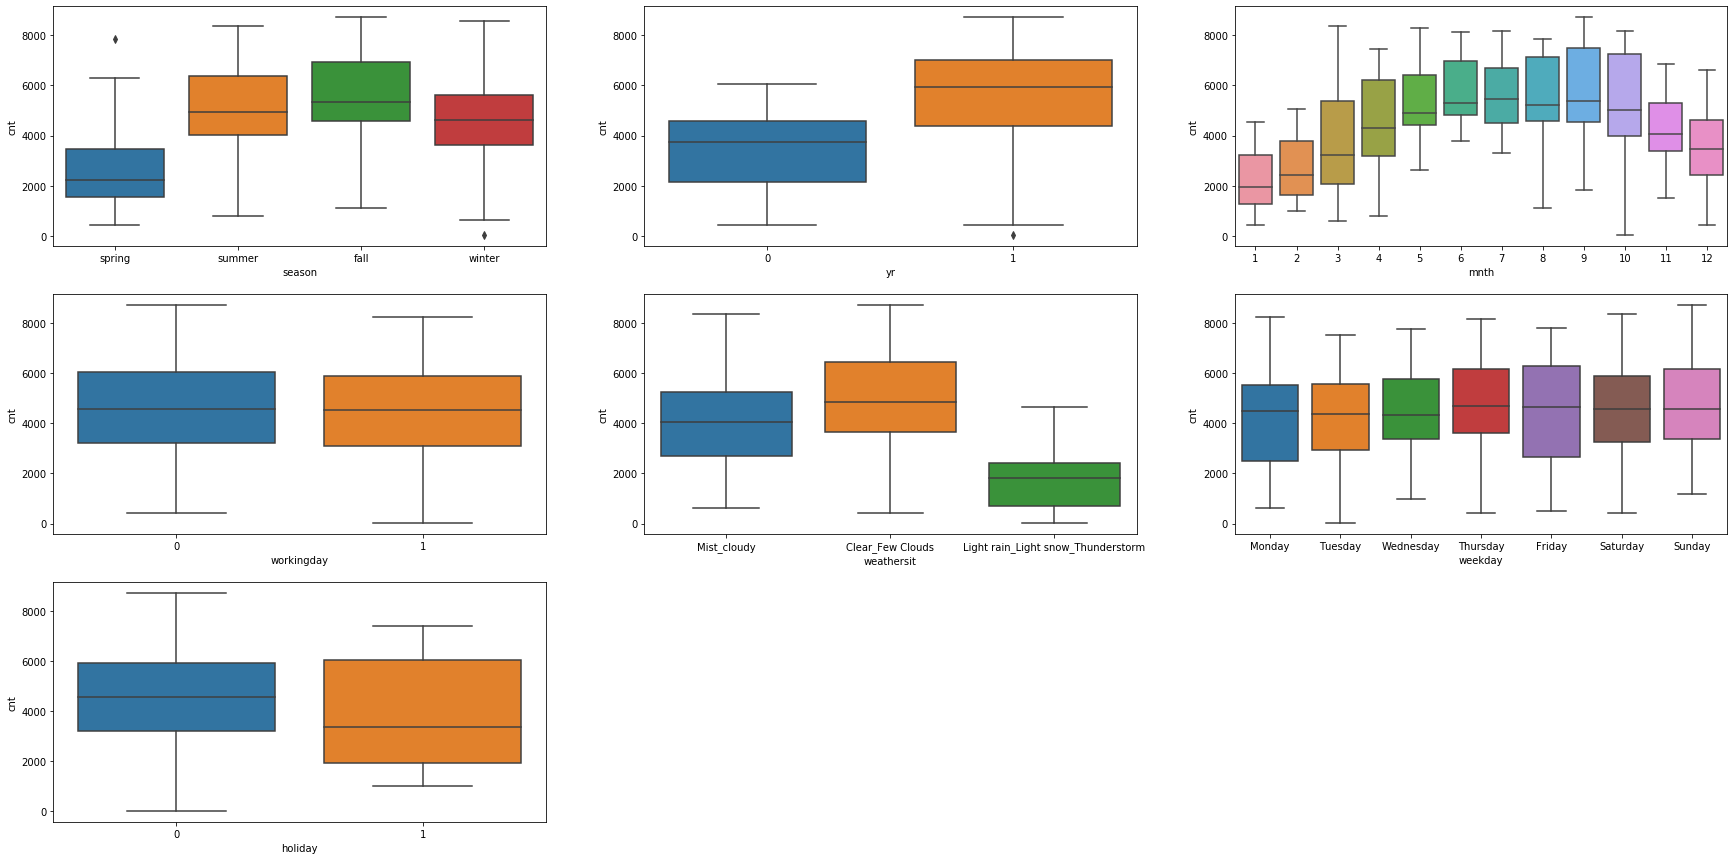

In [23]:
#visualize the categorical values
#to handle categorical data we hacve to create subplots 
# Visualizing Categorical Variables
# Target var for boom is 'cnt'
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.show()


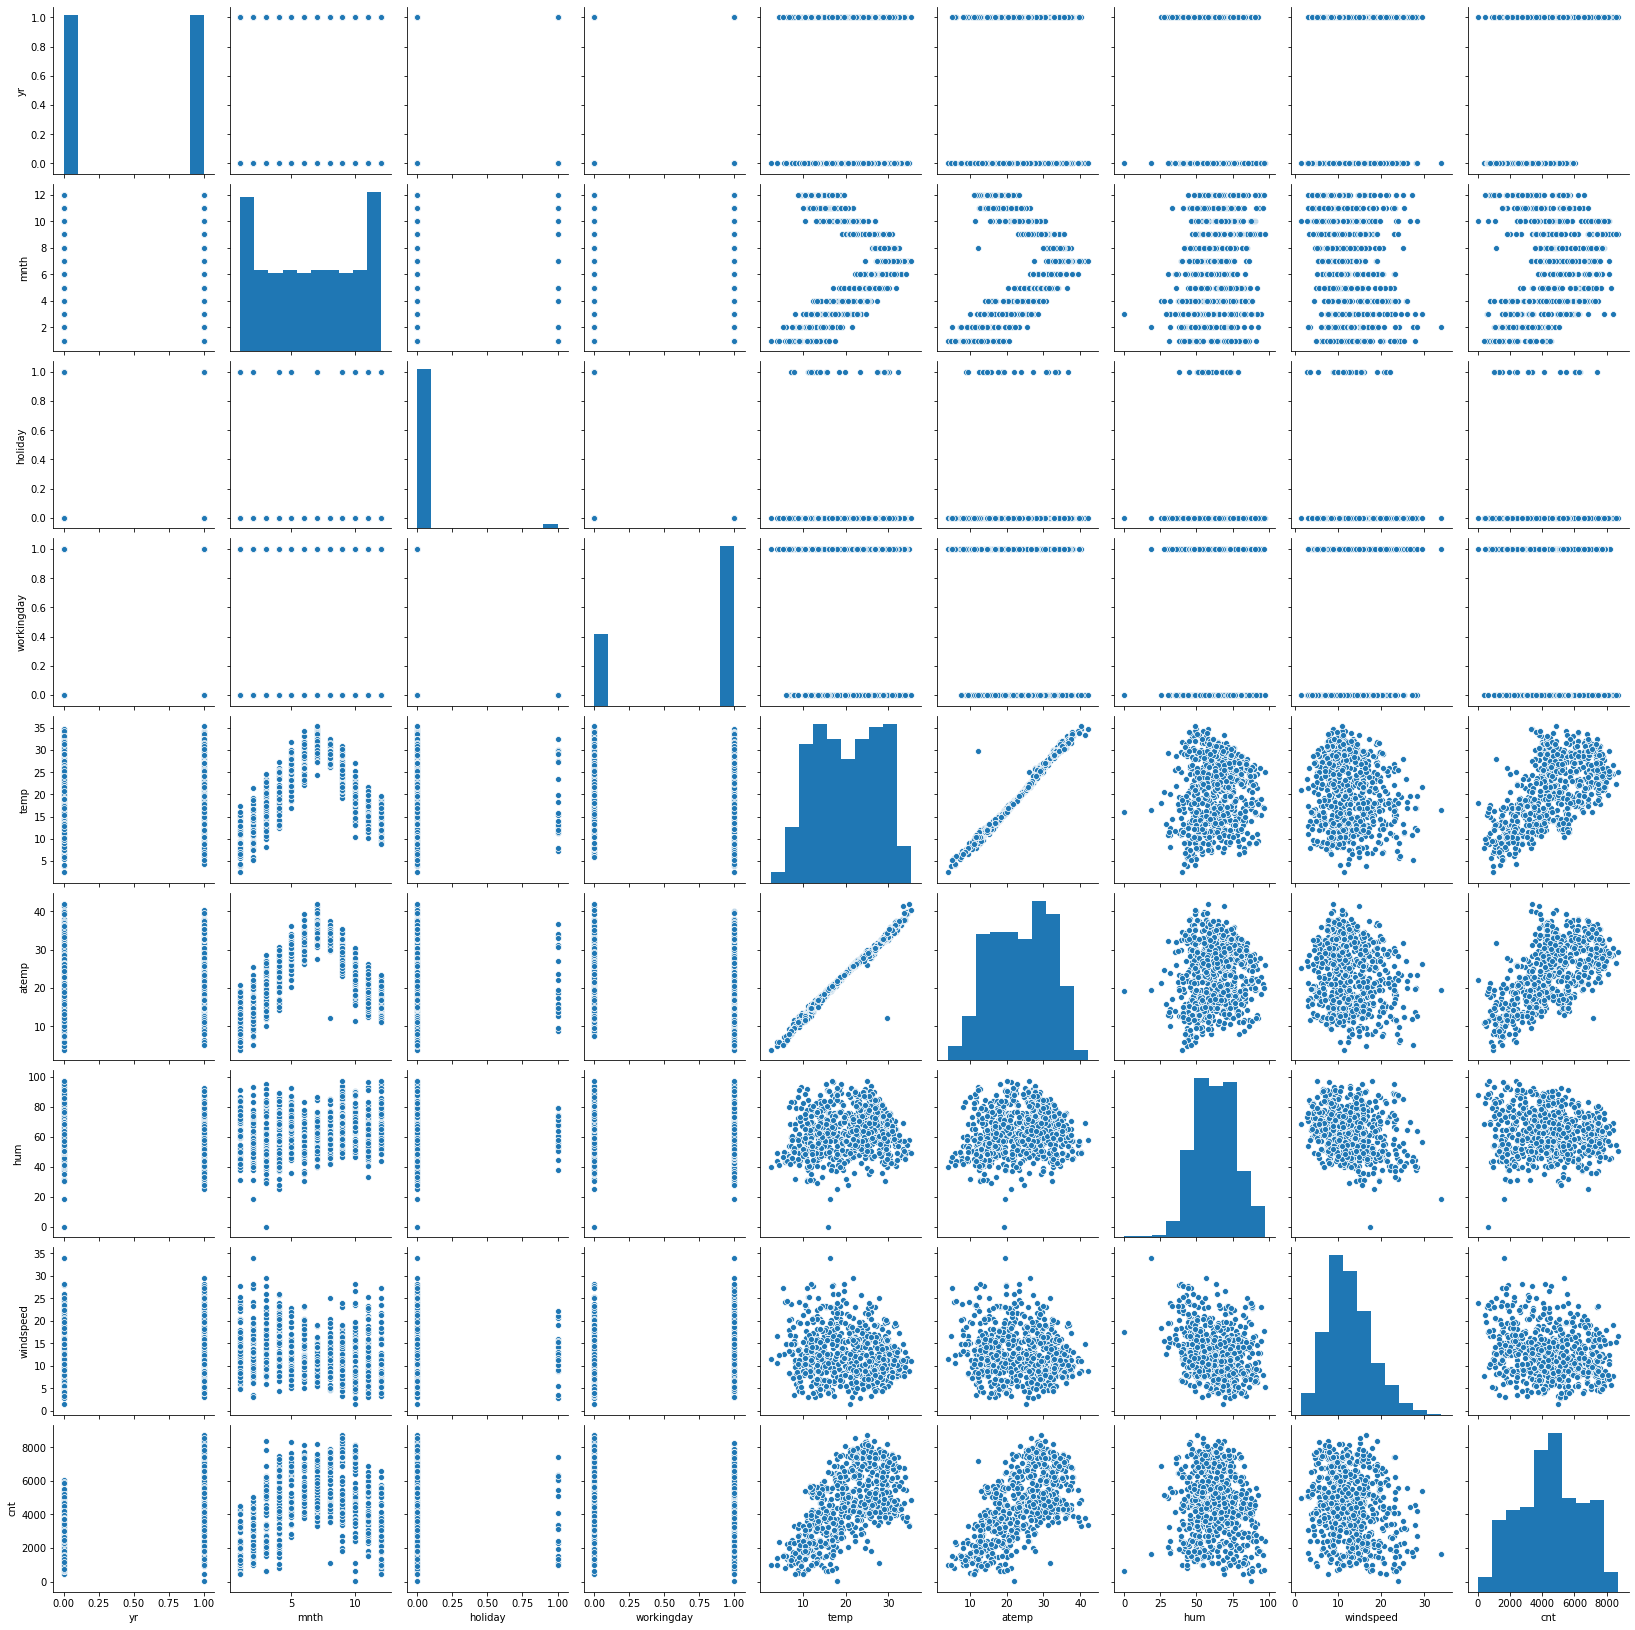

In [24]:
#visualise the numerical values 
sns.pairplot(bike_data)
plt.show()

<Figure size 864x576 with 0 Axes>

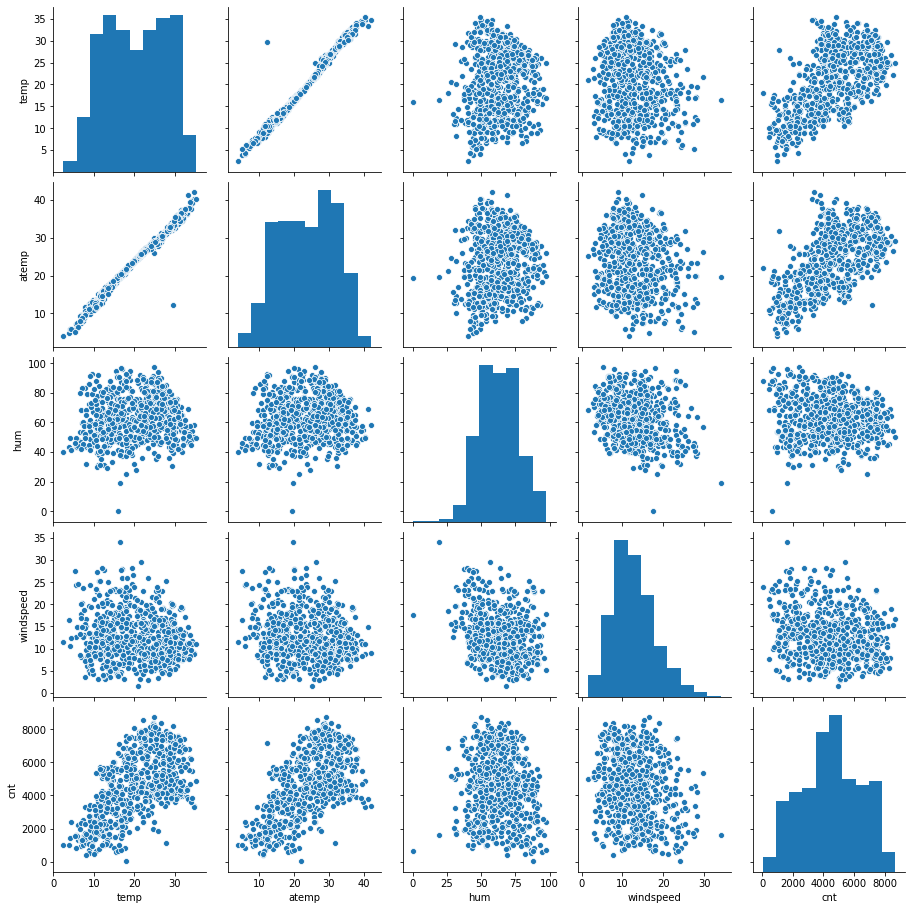

In [25]:
#checking the correlation, with the numerical variable 
nvar= ['temp','atemp','hum','windspeed','cnt']
plt.figure(figsize=(12,8))
sns.pairplot(bike_data[nvar])
plt.show();

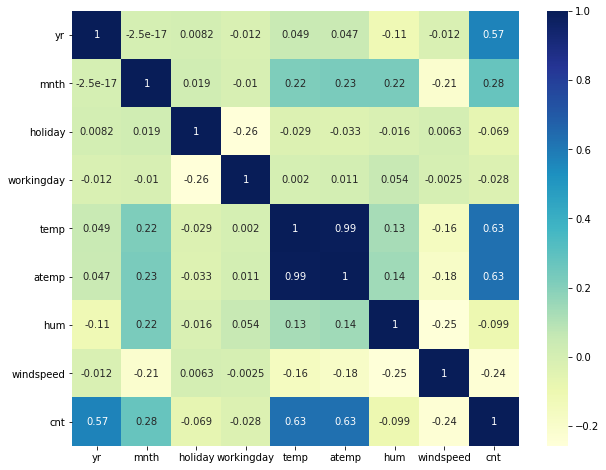

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(bike_data.corr(),annot = True,cmap='YlGnBu')


#### As there is a high correlation between temp and atemp, we are dropping temp variable having 1 correlation

In [27]:
bike_data.drop(['temp'],axis=1, inplace= True)
bike_data.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


#### Creating dummy variables
      - Dummy variable
      - Creating Train Test data split



In [28]:
#Convert variables to object type
bike_data['mnth']=bike_data['mnth'].astype(object)
bike_data['season']=bike_data['season'].astype(object)
bike_data['weathersit']=bike_data['weathersit'].astype(object)
bike_data['weekday']=bike_data['weekday'].astype(object)
bike_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [29]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 
Season_condition=pd.get_dummies(bike_data['season'],drop_first=True)
Weather_condition=pd.get_dummies(bike_data['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(bike_data['weekday'],drop_first=True)
Month=pd.get_dummies(bike_data['mnth'],drop_first=True)


In [30]:
#concatenating the data
bike_data=pd.concat([bike_data,Season_condition],axis=1)
bike_data=pd.concat([bike_data,Weather_condition],axis=1)
bike_data=pd.concat([bike_data,Day_of_week],axis=1)
bike_data=pd.concat([bike_data,Month],axis=1)
bike_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   atemp                               730 non-null    float64
 8   hum                                 730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  cnt                                 730 non-null    int64  
 11  spring                              730 non-n

In [31]:
#Deleting the orginal columns season.weathersit,weekday,mnth as they are redundant variables now
bike_data.drop(['season'],axis=1,inplace=True)
bike_data.drop(['weathersit'],axis=1,inplace=True)

bike_data.drop(['weekday'],axis=1,inplace=True)

bike_data.drop(['mnth'],axis=1,inplace=True)


bike_data.head()



,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# After handling the dummy variables, we are goin to split the data
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_data_train, bike_data_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)


In [33]:
bike_data_train.head()


,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [34]:
bike_data_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [35]:
bike_data_train.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
                                          5,
          

In [36]:
#Scaling the Numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [37]:
num_vars=['atemp','hum','windspeed','cnt']
bike_data_train[num_vars] = scaler.fit_transform(bike_data_train[num_vars])
bike_data_train.describe()


,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
#Creating X and Y, feeding the predictor variables and removing the target variable 'cnt' 
y_train = bike_data_train.pop('cnt')
X_train = bike_data_train

In [39]:
X_train.head()


,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [40]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#We use RFE apporach for feature selection
# we are going to start with 15 variables and we will use mixed approach to build a model

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 10),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 14),
 ('Tuesday', False, 9),
 ('Wednesday', False, 13),
 (2, False, 8),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 7),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 11),
 (12, False, 12)]

In [42]:
col = X_train.columns[rfe.support_]
col


Index([                                'yr',
                                  'holiday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]


Index(['workingday',     'summer',     'Monday',   'Saturday',     'Sunday',
         'Thursday',    'Tuesday',  'Wednesday',            2,            7,
                 10,           11,           12],
      dtype='object')

In [44]:
X_train_rfe = X_train[col]


In [45]:
#BUILDING MODEL USING STATSMODEL:

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe1).fit()



In [46]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          8.06e-186
Time:                        20:55:21   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.72
2,atemp,15.52
4,windspeed,4.56
5,spring,3.52
6,winter,3.21
8,Mist_cloudy,2.26
0,yr,2.08
13,8,1.90
11,5,1.77
10,4,1.68


In [48]:
X_train_rfe1.head()


,const,yr,holiday,atemp,hum,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,4,5,6,8,9
653,1.0,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1.0,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0,0
728,1.0,1,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,0,1,0,1,0,0,0,0


In [49]:
#COLUMN hum HAS A VERY HIGH VIF SO WE DROP IT 
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [50]:

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [51]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.75e-183
Time:                        20:55:21   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [144]:
bike_data.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
                                          5,
          

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.26
3,windspeed,4.56
4,spring,2.10
0,yr,2.08
5,winter,1.97
12,8,1.86
11,6,1.64
10,5,1.60
7,Mist_cloudy,1.55
9,4,1.54


In [53]:
#COLUMN temp HAS A VERY HIGH VIF SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [54]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.90e-153
Time:                        20:55:21   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [55]:
X_train_rfe.columns


Index([                                'yr',
                                  'holiday',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9],
      dtype='object')

In [143]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
2,spring,1.42
4,Mist_cloudy,1.41
5,3,1.23
8,8,1.14
11,10,1.14
9,9,1.12
6,5,1.11
10,7,1.08
7,6,1.07


In [56]:
#Windspeed has high VIF >2 so we drop it
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [57]:

X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     134.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          9.96e-148
Time:                        20:55:21   Log-Likelihood:                 407.93
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     497   BIC:                            -734.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [58]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.85
5,Mist_cloudy,1.53
2,spring,1.48
3,winter,1.39
6,3,1.23
10,8,1.17
7,4,1.14
8,5,1.14
11,9,1.12
9,6,1.08


In [59]:
#Winter has A VERY HIGH p-value WHUCH MEANS IT IS insignificant SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [60]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          9.28e-149
Time:                        20:55:21   Log-Likelihood:                 407.78
No. Observations:                 510   AIC:                            -791.6
Df Residuals:                     498   BIC:                            -740.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [61]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.61
2,spring,1.41
4,Mist_cloudy,1.39
5,3,1.23
9,8,1.13
6,4,1.11
7,5,1.11
10,9,1.11
8,6,1.07
1,holiday,1.03


In [62]:
#4 has A VERY HIGH p-value WHUCH MEANS IT IS insignificant SO WE DROP IT
X_train_rfe=X_train_rfe.drop([4],axis=1)

In [63]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.76e-149
Time:                        20:55:21   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [64]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
4,Mist_cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,Light rain_Light snow_Thunderstorm,1.02


In [65]:
#ADDING SATURDAY AND CHECKING IF MODEL IMPROVES

X_train_rfe['Saturday']=X_train['Saturday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Saturday
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0


In [66]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     147.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.58e-148
Time:                        20:55:21   Log-Likelihood:                 407.23
No. Observations:                 510   AIC:                            -790.5
Df Residuals:                     498   BIC:                            -739.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [67]:
#Saturday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [68]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.76e-149
Time:                        20:55:21   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [69]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
4,Mist_cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,Light rain_Light snow_Thunderstorm,1.02


In [70]:
#ADDING SUNDAY TO CHECK IF MODEL IMPROVES
X_train_rfe['Sunday']=X_train['Sunday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,1
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,1


In [71]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     147.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.28e-148
Time:                        20:55:22   Log-Likelihood:                 407.44
No. Observations:                 510   AIC:                            -790.9
Df Residuals:                     498   BIC:                            -740.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [72]:
#Sunday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop(['Sunday'],axis=1)

In [73]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
4,Mist_cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,Light rain_Light snow_Thunderstorm,1.02


In [74]:
#ADDING WORKING DAY TO CHECK IF MODEL IMPROVES
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,workingday
653,1,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1
482,1,0,0,0,1,0,0,0,0,0,0


In [75]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     148.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.76e-149
Time:                        20:55:22   Log-Likelihood:                 409.03
No. Observations:                 510   AIC:                            -794.1
Df Residuals:                     498   BIC:                            -743.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [76]:
#working has very high p-value so we drop it

X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [77]:
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.76e-149
Time:                        20:55:22   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [78]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
4,Mist_cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,Light rain_Light snow_Thunderstorm,1.02


In [79]:

#ADDING MONTH 2 TO CHECK IF MODEL IMPROVES
X_train_rfe[2]=X_train[2]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,2
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0


In [80]:
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()
print(lm11.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     146.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.33e-148
Time:                        20:55:22   Log-Likelihood:                 406.46
No. Observations:                 510   AIC:                            -788.9
Df Residuals:                     498   BIC:                            -738.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [81]:
#MONTH 2 has very high p-value so we drop it
X_train_rfe=X_train_rfe.drop([2],axis=1)

In [82]:
X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.76e-149
Time:                        20:55:22   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [83]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
4,Mist_cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,Light rain_Light snow_Thunderstorm,1.02


In [84]:
#ADDING MONTH 7 TO CHECK IF MODEL IMPROVES
X_train_rfe[7]=X_train[7]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,7
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0


In [85]:
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     155.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.11e-153
Time:                        20:55:22   Log-Likelihood:                 418.78
No. Observations:                 510   AIC:                            -813.6
Df Residuals:                     498   BIC:                            -762.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [86]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.60
2,spring,1.40
4,Mist_cloudy,1.37
5,3,1.23
8,8,1.13
9,9,1.11
6,5,1.10
10,7,1.07
7,6,1.06
1,holiday,1.03


In [87]:
#MODEL HAS IMPROVED SO WE KEEP MONTH 7


In [88]:
#ADDING MONTH 10 TO CHECK IF MODEL IMPROVES
X_train_rfe[10]=X_train[10]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,7,10
653,1,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,1,0
426,1,0,1,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [89]:
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.06e-160
Time:                        20:55:22   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [90]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
2,spring,1.42
4,Mist_cloudy,1.41
5,3,1.23
8,8,1.14
11,10,1.14
9,9,1.12
6,5,1.11
10,7,1.08
7,6,1.07


In [91]:
#MODEL HAS IMPROVED SO WE KEEP MONTH 10


In [92]:

#ADDING MONTH 11 TO CHECK IF MODEL IMPROVES
X_train_rfe[11]=X_train[11]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,7,10,11
653,1,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [93]:
X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.85e-159
Time:                        20:55:22   Log-Likelihood:                 437.99
No. Observations:                 510   AIC:                            -848.0
Df Residuals:                     496   BIC:                            -788.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [94]:
#We can see high p-value for 11 so we drop it
X_train_rfe=X_train_rfe.drop([11],axis=1)

In [95]:
X_train_rfe16= sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe16).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.06e-160
Time:                        20:55:22   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [96]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
2,spring,1.42
4,Mist_cloudy,1.41
5,3,1.23
8,8,1.14
11,10,1.14
9,9,1.12
6,5,1.11
10,7,1.08
7,6,1.07


In [97]:
#ADDING MONTH 12 TO SEE MODEL IMPROVES
X_train_rfe[12]=X_train[12]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,7,10,12
653,1,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [98]:
X_train_rfe17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     144.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.91e-159
Time:                        20:55:22   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -847.3
Df Residuals:                     496   BIC:                            -788.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [99]:
#We see high p-value for 12 so we drop it
X_train_rfe=X_train_rfe.drop([12],axis=1)

In [100]:
X_train_rfe18 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe18).fit()
print(lm18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.06e-160
Time:                        20:55:22   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [101]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
2,spring,1.42
4,Mist_cloudy,1.41
5,3,1.23
8,8,1.14
11,10,1.14
9,9,1.12
6,5,1.11
10,7,1.08
7,6,1.07


In [102]:
#ADDING MONDAY TO SEE MODEL IMPROVES
X_train_rfe['Monday']=X_train['Monday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,7,10,Monday
653,1,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [103]:
X_train_rfe19 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe19).fit()
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     146.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.31e-160
Time:                        20:55:22   Log-Likelihood:                 440.59
No. Observations:                 510   AIC:                            -853.2
Df Residuals:                     496   BIC:                            -793.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [104]:
# We see high p-value for Monday so we drop it
X_train_rfe=X_train_rfe.drop(['Monday'],axis=1)

In [105]:
X_train_rfe20 = sm.add_constant(X_train_rfe)
lm20 = sm.OLS(y_train,X_train_rfe20).fit()
print(lm20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.06e-160
Time:                        20:55:22   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [106]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
2,spring,1.42
4,Mist_cloudy,1.41
5,3,1.23
8,8,1.14
11,10,1.14
9,9,1.12
6,5,1.11
10,7,1.08
7,6,1.07


In [107]:
#ADDING TUESDAY TO SEE MODEL IMPROVES
X_train_rfe['Tuesday']=X_train['Tuesday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,7,10,Tuesday
653,1,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [108]:
X_train_rfe21 = sm.add_constant(X_train_rfe)
lm21 = sm.OLS(y_train,X_train_rfe21).fit()
print(lm21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          5.43e-160
Time:                        20:55:22   Log-Likelihood:                 439.71
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [109]:
# WE SEE HIGH P-VALUE FOR TUESDAY SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['Tuesday'],axis=1)

In [110]:
X_train_rfe22 = sm.add_constant(X_train_rfe)
lm22 = sm.OLS(y_train,X_train_rfe22).fit()
print(lm22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.06e-160
Time:                        20:55:23   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [111]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,yr,1.67
2,spring,1.42
4,Mist_cloudy,1.41
5,3,1.23
8,8,1.14
11,10,1.14
9,9,1.12
6,5,1.11
10,7,1.08
7,6,1.07


In [112]:
#ADDING WEDNESDAY TO SEE MODEL IMPROVES
X_train_rfe['Wednesday']=X_train['Wednesday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,7,10,Wednesday
653,1,0,0,0,0,0,0,0,0,0,0,1,1
576,1,0,0,0,0,0,0,0,0,0,1,0,1
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [113]:
X_train_rfe23 = sm.add_constant(X_train_rfe)
lm23 = sm.OLS(y_train,X_train_rfe23).fit()
print(lm23.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.70e-159
Time:                        20:55:23   Log-Likelihood:                 437.72
No. Observations:                 510   AIC:                            -847.4
Df Residuals:                     496   BIC:                            -788.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [114]:
#High p-value for Wednesday so we drop it

X_train_rfe=X_train_rfe.drop(['Wednesday'],axis=1)

In [115]:

X_train_rfe24 = sm.add_constant(X_train_rfe)
lm24 = sm.OLS(y_train,X_train_rfe24).fit()
print(lm24.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.06e-160
Time:                        20:55:23   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [116]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
2,spring,1.42
4,Mist_cloudy,1.41
5,3,1.23
8,8,1.14
11,10,1.14
9,9,1.12
6,5,1.11
10,7,1.08
7,6,1.07


In [117]:
#ADDING THURSDAY TO SEE MODEL IMPROVES
X_train_rfe['Thursday']=X_train['Thursday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,7,10,Thursday
653,1,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [118]:
X_train_rfe25 = sm.add_constant(X_train_rfe)
lm25 = sm.OLS(y_train,X_train_rfe25).fit()
print(lm25.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     145.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.47e-159
Time:                        20:55:23   Log-Likelihood:                 438.67
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     496   BIC:                            -790.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [119]:
# High p- value for Thursday so we drop it
X_train_rfe=X_train_rfe.drop(['Thursday'],axis=1)

In [120]:
X_train_rfe26 = sm.add_constant(X_train_rfe)
lm26 = sm.OLS(y_train,X_train_rfe26).fit()
print(lm26.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.06e-160
Time:                        20:55:23   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [121]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
2,spring,1.42
4,Mist_cloudy,1.41
5,3,1.23
8,8,1.14
11,10,1.14
9,9,1.12
6,5,1.11
10,7,1.08
7,6,1.07


In [122]:
#Predict values
y_train_cnt = lm14.predict(X_train_rfe14)

#### We did regression on all the columns. we have to select which model is giving the best result out all the models.
### Model lm14 has the optimum value so we are choosing it.

In [123]:
#Predicting the values:
y_train_cnt = lm14.predict(X_train_rfe14)

In [124]:
#Calculating the Residuals:
res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

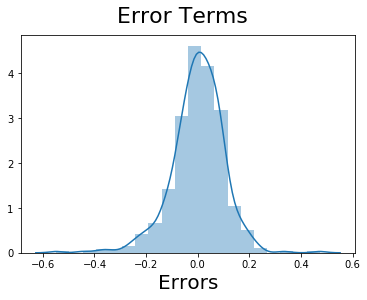

In [125]:
#we are checking the assumption of Normality.So we plot a histogram of all the error terms.

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 22)           
plt.xlabel('Errors', fontsize = 20)

In [126]:
#Checking all the columns
X_train_rfe14.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                          7,
                                         10],
      dtype='object')

In [127]:
print(X_train_rfe14.shape)
print(res.shape)

(510, 13)
(510,)


In [128]:
#Scaling the test data for better fit

num_vars=['atemp','hum','windspeed','cnt']
bike_data_test[num_vars] = scaler.fit_transform(bike_data_test[num_vars])

In [129]:
#Creating x and y sets

y_test = bike_data_test.pop('cnt')
X_test = bike_data_test

In [130]:
X_train_new=X_train_rfe14.drop(['const'], axis=1)

In [131]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [132]:
X_train_rfe14.columns


Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                          7,
                                         10],
      dtype='object')

In [133]:
#Making predictions on the chosen model
y_pred = lm14.predict(X_test_new)


Text(0, 0.5, 'y_pred')

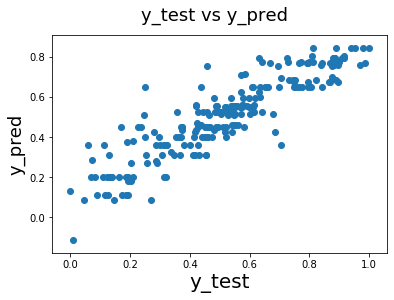

In [134]:
#CHECKING PREDICTED V/s TEST DATA 
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=18)
plt.xlabel('y_test', fontsize=20)              
plt.ylabel('y_pred', fontsize=18)                         

### We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.


In [135]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [136]:
# It returns the mean squared error after that we take the square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.10767288514704769

In [137]:
#Calculating  the r square values

r_squared = r2_score(y_test, y_pred)
r_squared

0.7955961097986249

### R square of our model is 79.5

In [138]:
X_t=X_train_new.iloc[:,0].values


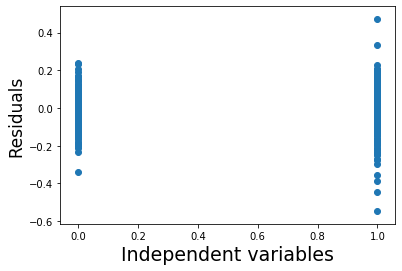

In [139]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=22)              
plt.xlabel('Independent variables', fontsize=19)
plt.ylabel('Residuals', fontsize=17)  
plt.show()

### When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.¶


In [140]:
X_train_new.head()


,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,7,10
653,1,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,1,0
426,1,0,1,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [141]:
print(X_train_rfe14.columns)
print(lm14.summary())

Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                          7,
                                         10],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.06e-1

In [142]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
2,spring,1.42
4,Mist_cloudy,1.41
5,3,1.23
8,8,1.14
11,10,1.14
9,9,1.12
6,5,1.11
10,7,1.08
7,6,1.07


#### We can see that the equation for best fitted line is:

#### cnt= 0.247 X yr - 0.075 X holiday - 0.198 X Spring - 0.3154 X Light rain_Light snow_Thunderstorm - 0.088 X Mist_Cloudy +0.066 X 3 + 0.123 X 5 +0.148 X 6 +0.156 X 8 + 0.195 X 9 + 0.125 X 7 + 0.113 X 10



###### We can predict the demand for bikes is majorily dependent on the variables mentioned below:
###### yr , holiday ,Spring, Mist_Cloudy, Light rain_Light snow_Thunderstorm,3(Mar), 5(May), 6(Jun),7(Jul), 8(Aug) ,9(Sep),10(Oct).


#### we can see that demands increases in the month of 3(Mar), 5(May), 6(Jun),7(Jul), 8(Aug) ,9(Sep),10(Oct) and yr 2019
#### Demand decreases when there is holiday , Spring, Light rain_Light snow_Thunderstorm, Mist_cloudy
#### Final recommendations for the company:
#### Demand is higher in month of 3(Mar), 5(May), 6(Jun),7(Jul), 8(Aug) ,9(Sep),10(Oct), weather conditions like Light,Rain,Snow thunderstrom, Mist adversily affect the cnt of bike rental